# Mycotoxin Contamination Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Sample mycotoxin concentration data (in ppb) for different mycotoxins
# Each list represents contamination levels for a specific mycotoxin
mycotoxins = {
    "Aflatoxins": [5, 7, 6, 8, 200, 9, 10, 6, 5, 300, 7, 8, 9],
    "Ochratoxin A": [2, 3, 4, 2, 50, 3, 2, 3, 60, 4, 2],
    "Fumonisins": [500, 700, 800, 2000, 900, 1800, 700, 600, 2100],
    "Zearalenone": [30, 40, 35, 500, 45, 100, 50, 60],
    "Deoxynivalenol": [800, 900, 950, 1000, 1500, 1200, 1100, 3000]
}


In [3]:
# Function to detect outliers using z-score
def detect_outliers(data):
    mean = np.mean(data)  # Calculate the mean of the data
    std_dev = np.std(data)  # Calculate the standard deviation of the data
    # Calculate z-scores for each data point, where z > 2 or z < -2 indicates an outlier
    z_scores = [(x - mean) / std_dev for x in data]
    # Identify outliers based on the absolute value of the z-score
    outliers = [data[i] for i in range(len(z_scores)) if abs(z_scores[i]) > 2]
    return outliers, mean

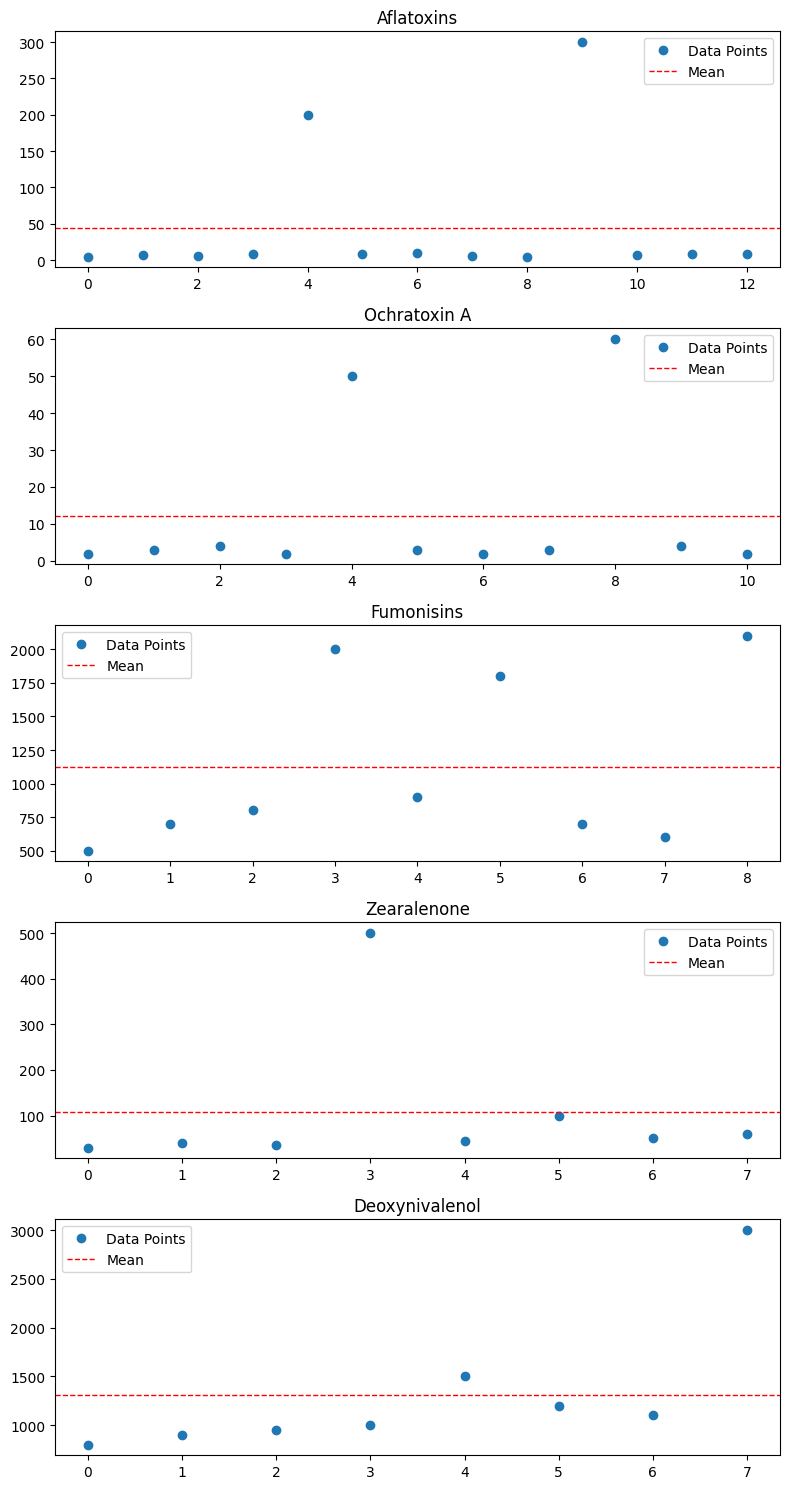

In [4]:
# Plot each mycotoxin contamination levels
# Create subplots, one for each mycotoxin, to display the data points and mean
fig, axs = plt.subplots(len(mycotoxins), 1, figsize=(8, 15))

# Iterate over the mycotoxins and plot data
for i, (name, data) in enumerate(mycotoxins.items()):
    outliers, mean = detect_outliers(data)  # Get outliers and mean for the current mycotoxin
    ticks = range(len(data))  # X-axis values representing each data point
    
    # Plot data points (without connecting lines) and label the data points
    axs[i].plot(ticks, data, marker='o', linestyle='none', label='Data Points')
    # Plot a horizontal dashed line at the mean value
    axs[i].axhline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
    axs[i].set_title(name)  # Set the title for each subplot (the mycotoxin's name)
    axs[i].legend()  # Display the legend for data points and the mean line

# Adjust layout to prevent overlapping and make it look tidy
plt.tight_layout()
plt.show()

In [5]:
# Print detected outliers for each mycotoxin type
# After plotting, the outliers for each mycotoxin are displayed in the console
for name, data in mycotoxins.items():
    outliers, _ = detect_outliers(data)  # Get outliers for the current mycotoxin
    print(f"{name} - Detected outliers: {outliers}")  

Aflatoxins - Detected outliers: [300]
Ochratoxin A - Detected outliers: [60]
Fumonisins - Detected outliers: []
Zearalenone - Detected outliers: [500]
Deoxynivalenol - Detected outliers: [3000]


### Explanation of the Graph and Analysis

The graph generated by the Python script provides a visual representation of mycotoxin contamination levels for different types of mycotoxins. Each subplot represents contamination data for a specific mycotoxin, with data points plotted individually. 
A red dashed line marks the mean contamination level.
Outliers, detected using the z-score method, indicate extreme contamination cases that require immediate attention.

Detected outliers include:
- **Aflatoxins**: 300 ppb
- **Ochratoxin A**: 60 ppb
- **Fumonisins**: No extreme outliers detected
- **Zearalenone**: 500 ppb
- **Deoxynivalenol**: 3000 ppb

Identifying these outliers helps food safety experts take corrective measures, such as removing contaminated batches or improving storage conditions to prevent further contamination. This approach is crucial for maintaining food quality and ensuring safety standards.

## Conclusion

Mycotoxins pose a significant risk to food safety and animal health. Proper monitoring, storage, and regulatory measures are crucial in minimizing their impact.
